# 0.0 - Imports Libraries

In [1]:
import time
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

# Graphics
import matplotlib.pyplot as plt

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn           import metrics  as mt

# 1.0 - Load Dataset

In [2]:
dataset_path = '../dataset/classificacao/X_training.csv'
df_X_train = pd.read_csv( dataset_path )

dataset_path = '../dataset/classificacao/X_validation.csv'
df_X_val = pd.read_csv( dataset_path )

dataset_path = '../dataset/classificacao/X_test.csv'
df_X_test = pd.read_csv( dataset_path )

dataset_path = '../dataset/classificacao/y_training.csv'
df_y_train = pd.read_csv( dataset_path )

dataset_path = '../dataset/classificacao/y_validation.csv'
df_y_val = pd.read_csv( dataset_path )

dataset_path = '../dataset/classificacao/y_test.csv'
df_y_test = pd.read_csv( dataset_path )

## 1.1 Entendendo os Dados

In [3]:
print(f'O tamanho do conjunto de dados de treinamento é {df_X_train.shape}' )
print(f'O tamanho do conjunto de dados(rótulo) de treinamento é { len( df_y_train )}' )
print('---------------------------------------------------------')
print(f'O tamanho do conjunto de dados de validação é {df_X_val.shape}' )
print(f'O tamanho do conjunto de dados(rótulo) de validação é { len( df_y_val )}' )
print('---------------------------------------------------------')
print(f'O tamanho do conjunto de dados de teste é {df_X_test.shape}' )
print(f'O tamanho do conjunto de dados(rótulo) de teste é {len( df_y_test )}' )

O tamanho do conjunto de dados de treinamento é (72515, 25)
O tamanho do conjunto de dados(rótulo) de treinamento é 72515
---------------------------------------------------------
O tamanho do conjunto de dados de validação é (31079, 25)
O tamanho do conjunto de dados(rótulo) de validação é 31079
---------------------------------------------------------
O tamanho do conjunto de dados de teste é (25893, 25)
O tamanho do conjunto de dados(rótulo) de teste é 25893


In [4]:
df_X_train.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,...,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,...,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


In [5]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 72515 non-null  int64  
 1   customer_type                      72515 non-null  int64  
 2   age                                72515 non-null  float64
 3   class                              72515 non-null  float64
 4   flight_distance                    72515 non-null  float64
 5   inflight_wifi_service              72515 non-null  float64
 6   departure_arrival_time_convenient  72515 non-null  float64
 7   ease_of_online_booking             72515 non-null  float64
 8   gate_location                      72515 non-null  float64
 9   food_and_drink                     72515 non-null  float64
 10  online_boarding                    72515 non-null  float64
 11  seat_comfort                       72515 non-null  flo

In [6]:
df_X_train.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,72515.0,64786.264,37484.447,1.0,32337.500,64688.000,97230.000,129880.0
customer_type,72515.0,0.817,0.387,0.0,1.000,1.000,1.000,1.0
age,72515.0,0.416,0.194,0.0,0.256,0.423,0.564,1.0
class,72515.0,0.514,0.481,0.0,0.000,0.500,1.000,1.0
flight_distance,72515.0,0.234,0.202,0.0,0.077,0.164,0.346,1.0
inflight_wifi_service,72515.0,0.547,0.265,0.0,0.400,0.600,0.800,1.0
departure_arrival_time_convenient,72515.0,0.612,0.305,0.0,0.400,0.600,0.800,1.0
ease_of_online_booking,72515.0,0.552,0.280,0.0,0.400,0.600,0.800,1.0
gate_location,72515.0,0.596,0.256,0.0,0.400,0.600,0.800,1.0
food_and_drink,72515.0,0.640,0.266,0.0,0.400,0.600,0.800,1.0


# 2. Algoritimo: K-NEAREST NEIGHBORS (KNN)

Parametros:
* n_neighbors

# 2.0.1 Feature Selection

In [7]:
# A seleção de features é o processo de isolar os recursos mais consistentes, não redundantes e relevantes para usar na construção do modelo.
# Manter apenas caracteristicas numéricas onde exista uma relação de similaridade baseada em distância. (Premissa do KNN)
# Ex: Descartar o ID (pois não possui similaridade entre dois clientes pelo ID) e também descartar característica binárias (0 e 1).

# Selected Features
features = ['age', 'class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient','ease_of_online_booking', 
            'gate_location', 'food_and_drink','online_boarding', 'seat_comfort', 'inflight_entertainment','on_board_service', 
            'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 
            'departure_delay_in_minutes', 'arrival_delay_in_minutes']

X_train_knn = df_X_train.loc[:, features]
X_val_knn = df_X_val.loc[:, features]
X_test_knn = df_X_test.loc[:, features]

y_train = df_y_train.iloc[:, 0].values
y_val =   df_y_val.iloc[:, 0].values
y_test =  df_y_test.iloc[:, 0].values

print( f'Tamanho do Conjunto de Dados X_train_knn com Features: {X_train_knn.shape}' )
print( f'Tamanho do Conjunto de Dados y_train: {len( y_train)}' )
print('---------------------------------------------------------')
print( f'Tamanho do Conjunto de Dados X_val_knn com Features: {X_val_knn.shape}' )
print( f'Tamanho do Conjunto de Dados y_val: {len( y_val)}' )
print('---------------------------------------------------------')
print( f'Tamanho do Conjunto de Dados X_test_knn com Features: {X_test_knn.shape}' )
print( f'Tamanho do Conjunto de Dados y_test: {len( y_test)}' )

Tamanho do Conjunto de Dados X_train_knn com Features: (72515, 19)
Tamanho do Conjunto de Dados y_train: 72515
---------------------------------------------------------
Tamanho do Conjunto de Dados X_val_knn com Features: (31079, 19)
Tamanho do Conjunto de Dados y_val: 31079
---------------------------------------------------------
Tamanho do Conjunto de Dados X_test_knn com Features: (25893, 19)
Tamanho do Conjunto de Dados y_test: 25893


## 2.1 - Performance for Train Dataset

In [8]:
# Define model
knn = KNeighborsClassifier()

# Training
knn.fit( X_train_knn.values, y_train )

# Predict
y_pred_train = knn.predict( X_train_knn.values )

# Performance metrics
matrix = mt.confusion_matrix( y_train, y_pred_train )
accuracy_train = mt.accuracy_score( y_train, y_pred_train )
precision_train = mt.precision_score( y_train, y_pred_train )
recall_train = mt.recall_score( y_train, y_pred_train )
f1_score_train = mt.f1_score( y_train, y_pred_train )

print('Matriz Confusão')
print(matrix)
print('---------------------------')
print( f'A acurácia é: { accuracy_train:.3%}')
print( f'A precisão é: { precision_train:.3%}')
print( f'A recall é:   { recall_train:.3%}')
print( f'F1 Score é    { f1_score_train:.3%}')

Matriz Confusão
[[39818  1269]
 [ 2826 28602]]
---------------------------
A acurácia é: 94.353%
A precisão é: 95.752%
A recall é:   91.008%
F1 Score é    93.320%


## 2.2 - Performance for Validation Dataset

In [9]:
# Define model
knn = KNeighborsClassifier()

# Training
knn.fit( X_train_knn.values, y_train )

# Predict
y_pred_val = knn.predict( X_val_knn.values )

# Performance metrics
matrix_val = mt.confusion_matrix( y_val, y_pred_val )
accuracy_val = mt.accuracy_score( y_val, y_pred_val )
precision_val = mt.precision_score( y_val, y_pred_val )
recall_val = mt.recall_score( y_val, y_pred_val )
f1_score_val = mt.f1_score( y_val, y_pred_val )

print('Matriz Confusão')
print(matrix_val)
print('---------------------------')
print( f'A acurácia (Validation Dataset) é: { accuracy_val:.3%}')
print( f'A precisão (Validation Dataset) é: { precision_val:.3%}')
print( f'A recall (Validation Dataset) é:   { recall_val:.3%}')
print( f'F1 Score (Validation Dataset) é    { f1_score_val:.3%}')

Matriz Confusão
[[16774   836]
 [ 1644 11825]]
---------------------------
A acurácia (Validation Dataset) é: 92.020%
A precisão (Validation Dataset) é: 93.397%
A recall (Validation Dataset) é:   87.794%
F1 Score (Validation Dataset) é    90.509%


# 2.3 Hyperparameters Fine Tuning

In [10]:
values = [k for k in range( 3, 63, 2 )] 

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [11]:
for k in values:
    # Define model
    model = KNeighborsClassifier( n_neighbors = k )

    # Training
    model.fit( X_train_knn.values, y_train)

    # Predict
    yhat_pred = model.predict( X_val_knn.values )

    # Performance metrics
    accuracy = mt.accuracy_score( y_val, yhat_pred )
    precision = mt.precision_score( y_val, yhat_pred )
    recall = mt.recall_score( y_val, yhat_pred )
    f1_score = mt.f1_score( y_val, yhat_pred )

    accuracy_list.append( accuracy )
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score ) 

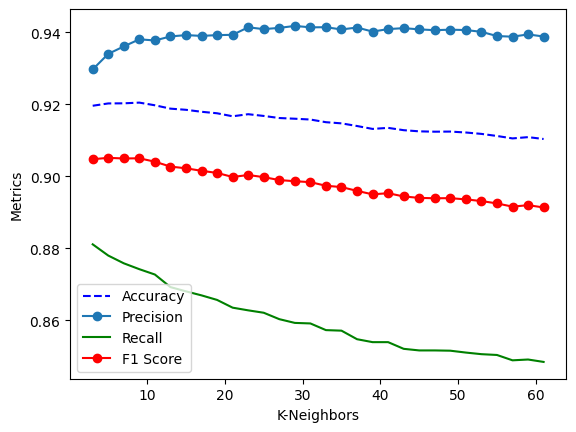

In [12]:
plt.plot( values, accuracy_list, 'b--', label='Accuracy' )
plt.plot( values, precision_list, 'o-', label='Precision' )
plt.plot( values, recall_list, 'g-', label='Recall' )
plt.plot( values, f1_score_list, 'r-o', label='F1 Score' )
plt.xlabel( 'K-Neighbors' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_n = values[ np.argmax(accuracy_list) ]
best_n

9

## 2.4 Performance for Test Dataset

In [14]:
# Model
knn = KNeighborsClassifier( n_neighbors=best_n )

# Training
knn.fit( np.concatenate(( X_train_knn.values, X_val_knn.values)), np.concatenate(( y_train, y_val )) )

# Predict
y_pred_test = knn.predict( X_test_knn.values )

# Métricas de Performance
matrix_test = mt.confusion_matrix( y_test, y_pred_test)
accuracy_test = mt.accuracy_score( y_test, y_pred_test )
precision_test = mt.precision_score( y_test, y_pred_test )
recall_test = mt.recall_score( y_test, y_pred_test )
f1_score_test = mt.f1_score(y_test, y_pred_test )

print('Matriz Confusão')
print(matrix_test)
print('---------------------------')
print( f'A acurácia é: { accuracy_test:.3%}' )
print( f'A precisão é: { precision_test:.3%}' )
print( f'A recall é:   { recall_test:.3%}' )
print( f'F1 Score é    { f1_score:.3%}' )

Matriz Confusão
[[13881   647]
 [ 1370  9995]]
---------------------------
A acurácia é: 92.210%
A precisão é: 93.920%
A recall é:   87.945%
F1 Score é    89.131%
